In [19]:
!pip install tensorflow shap flask pyngrok joblib
!pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 75.1 MB/s eta 0:00:00


In [20]:
import pandas as pd
import numpy as np
import joblib
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
df = pd.read_csv("/content/students.csv", sep=";")
df["Pass"] = df["G3"].apply(lambda x: 1 if x >= 10 else 0)

X = df[["G1", "G2", "studytime"]]
y = df["Pass"]


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Preprocessing completed.")

Preprocessing completed.


In [22]:
model = Sequential([
    Input(shape=(3,)),
    Dense(16, activation="relu"),
    Dense(8, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=Adam(0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    X_train_scaled,
    y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.2864 - loss: 0.8140 - val_accuracy: 0.4038 - val_loss: 0.7168
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5656 - loss: 0.6914 - val_accuracy: 0.8077 - val_loss: 0.6378
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8218 - loss: 0.6341 - val_accuracy: 0.8846 - val_loss: 0.5864
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9103 - loss: 0.5881 - val_accuracy: 0.9135 - val_loss: 0.5242
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9168 - loss: 0.5145 - val_accuracy: 0.9135 - val_loss: 0.4541
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9110 - loss: 0.4449 - val_accuracy: 0.9038 - val_loss: 0.3884
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9153 - loss: 0.3782 - val_accuracy: 0.9135 - val_loss: 0.3307
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9354 - loss: 0.3204 - val_accuracy: 0.9135 - val_

In [23]:
y_pred = (model.predict(X_test_scaled) >= 0.5).astype(int)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Accuracy : 0.9230769230769231
Precision: 0.9565217391304348
Recall   : 0.9565217391304348
F1 Score : 0.9565217391304348


In [24]:
model.save("student_ann_model.keras")
joblib.dump(scaler, "scaler.pkl")

print("Model & scaler saved.")


Model & scaler saved.


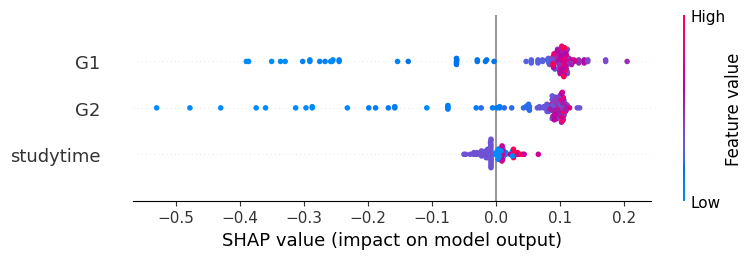

In [25]:
import shap

explainer = shap.Explainer(model, X_train_scaled)
shap_values = explainer(X_test_scaled)

shap.summary_plot(shap_values, X_test, feature_names=X.columns)


In [26]:
%%writefile app.py
import streamlit as st
import numpy as np
import joblib
from tensorflow.keras.models import load_model

# Load trained model and scaler
model = load_model("student_ann_model.h5")
scaler = joblib.load("scaler.pkl")

# UI
st.title("🎓 Student Performance Prediction")

st.write("Enter student academic details:")

G1 = st.number_input("G1 (First Period Grade)", min_value=0, max_value=20)
G2 = st.number_input("G2 (Second Period Grade)", min_value=0, max_value=20)
studytime = st.selectbox("Study Time (1 = low, 4 = high)", [1, 2, 3, 4])

if st.button("Predict Result"):
    input_data = np.array([[G1, G2, studytime]])
    input_scaled = scaler.transform(input_data)
    prob = model.predict(input_scaled)[0][0]

    if prob >= 0.5:
        st.success(f"Prediction: PASS ✅ (Probability: {prob:.2f})")
    else:
        st.error(f"Prediction: FAIL ❌ (Probability: {prob:.2f})")


Writing app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501


⠙⠹

⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) 
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.191.254:8501



In [ ]:
# from flask import Flask, request, jsonify, render_template_string
# from pyngrok import ngrok
# import numpy as np
# import joblib
# from tensorflow.keras.models import load_model

# app = Flask(__name__)

# model = load_model("student_ann_model.keras")
# scaler = joblib.load("scaler.pkl")


In [ ]:
HTML_PAGE = """
<!DOCTYPE html>
<html>
<head>
    <title>Student Performance Predictor</title>
    <style>
        body { font-family: Arial; background: #f4f4f4; padding: 40px; }
        .box { background: white; padding: 25px; width: 350px; margin: auto; border-radius: 10px; }
        input, button { width: 100%; padding: 10px; margin: 8px 0; }
        button { background: #007bff; color: white; border: none; }
        h2 { text-align: center; }
    </style>
</head>
<body>
<div class="box">
<h2>Student Performance</h2>
<input id="g1" placeholder="G1 Grade">
<input id="g2" placeholder="G2 Grade">
<input id="study" placeholder="Study Time (1–4)">
<button onclick="predict()">Predict</button>
<p id="result"></p>
</div>

<script>
function predict(){
fetch("/predict", {
method: "POST",
headers: {"Content-Type": "application/json"},
body: JSON.stringify({
G1: parseFloat(g1.value),
G2: parseFloat(g2.value),
studytime: parseFloat(study.value)
})
})
.then(res => res.json())
.then(data => {
document.getElementById("result").innerHTML =
"Result: <b>" + data.Prediction +
"</b><br>Probability: " + data.Probability;
});
}
</script>
</body>
</html>
"""


In [ ]:
# @app.route("/")
# def home():
#     return render_template_string(HTML_PAGE)

# @app.route("/predict", methods=["POST"])
# def predict():
#     data = request.get_json()
#     input_data = np.array([[data["G1"], data["G2"], data["studytime"]]])
#     input_scaled = scaler.transform(input_data)

#     prob = model.predict(input_scaled)[0][0]
#     result = "Pass" if prob >= 0.5 else "Fail"

#     return jsonify({
#         "Prediction": result,
#         "Probability": round(float(prob), 3)
#     })


In [ ]:
# from pyngrok import ngrok
# ngrok.kill()


In [ ]:
# from pyngrok import ngrok

# ngrok.set_auth_token("37cYZAtUZ2bnmoVMaUrPZ49ZOxm_66RzYbwNqDU3svVbmkEZc")


In [ ]:

# public_url = ngrok.connect(5000)
# print("Public URL:", public_url)

# app.run()
